## Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Problem 1

In [ ]:
# creating a random set of 1000 numbers between 1 and 6 

thousand_ones = np.ones(1000)
random_set = np.random.randint(thousand_ones, thousand_ones*7)

In [ ]:
# counting frequencies of apperiences in a single run of 1000
run_zero = {i: np.count_nonzero(random_set == i) for i in range(1,7)}
run_zero

{1: 150, 2: 181, 3: 171, 4: 168, 5: 171, 6: 159}

In [ ]:
# calculating the average and standard deviation

average = np.average(random_set)
std = np.std(random_set)

print('average: ', average, ' standard deviation: ', std)

average:  3.506  standard deviation:  1.6756980634947336


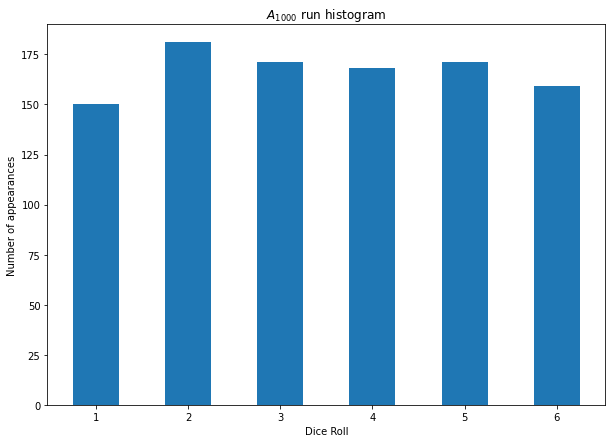

In [ ]:
# a historgram of the frequencies

x = np.arange(1, 8, 1)
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(random_set, x, rwidth = 0.5, align = 'left')
ax.set_xlabel('Dice Roll')
ax.set_ylabel('Number of appearances')
ax.set_title('$A_{1000}$ run histogram')

plt.show()

In [ ]:
def average1000():
    """
    This is a function that returns average dice value of a single random 1000 rolls run
    """
    thousand_ones = np.ones(1000)
    return np.average(np.random.randint(thousand_ones, thousand_ones*7))

In [ ]:
# creating an array of average values in 100 runs

hundred_runs = [average1000() for i in range(10000)]

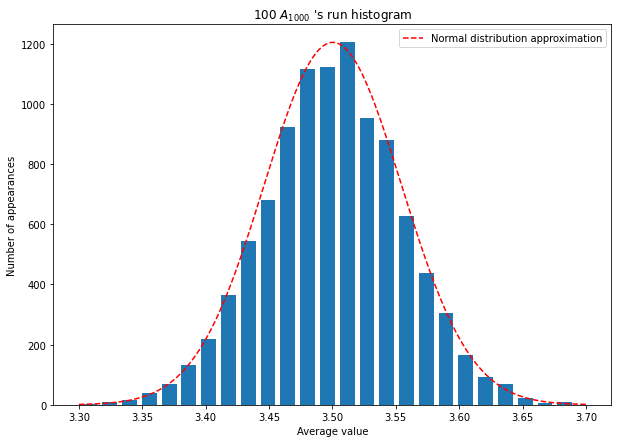

In [ ]:
# creating a histogram for 100 runs of A_1000

fig, ax = plt.subplots(figsize = (10,7))
y,x,_ = ax.hist(hundred_runs, 25, rwidth = 0.75, align = 'mid')
ax.set_xlabel('Average value')
ax.set_ylabel('Number of appearances')
ax.set_title("100 $A_{1000}$ 's run histogram")

#plotting a Normal distribution approximation

xaxis = np.arange(3.3,3.7, 0.001)
mean = np.average(hundred_runs)
std = np.std(hundred_runs)
plt.plot(xaxis, max(y)/max(norm.pdf(xaxis, mean, std))*norm.pdf(xaxis, mean, std), 'r--', label = 'Normal distribution approximation')
plt.legend()
plt.show()

In [ ]:
mean

3.5002771999999998

In [ ]:
std

0.054178316328213814

# Problem 2

In [ ]:
# creating doors, a lucky door and unlucky ones for keeping track
doors = np.arange(1,8)

lucky_door = np.random.randint(1,8)
print('lucky door is', lucky_door)

unlucky = np.delete(doors, np.where(doors == lucky_door))
print('unlucky doors are ', unlucky)

lucky door is 5
unlucky doors are  [1 2 3 4 6 7]


In [ ]:
# simulation guests choice of three random doors followed by host choice of non-guest non-lucky doors

guest = np.random.choice(doors, 3, replace = False)

print('guest rooms are', guest)

host = []
for i in doors:
    if i not in guest and i != lucky_door:
        host.append(i)
    if len(host) > 3:
        host = host[:-1]
host = np.array(host)
print('host  rooms are', host)

guest rooms are [4 2 1]
host  rooms are [3 6 7]


In [ ]:
# here we simulate "number" of runs of guest choosing a strategy of switching the doors
result = []
number = 1000000
    
for i in range(number):
    doors = np.arange(1,8)
    lucky_door = np.random.randint(1,8)

    guest = np.random.choice(doors, 3, replace = False)

    if lucky_door not in guest:
        result.append(1)
    else:
        result.append(0)

In [ ]:
print('probabilty of winning using the strategy is:', np.average(result))
print('standard deviation is: ', np.std(result)/np.sqrt(len(result)))
print('the true value of 4/7 is:', 4/7)
print('the difference is', abs((np.average(result) - 4/7)/(np.std(result)/np.sqrt(len(result)))), 'standrad deviations')

probabilty of winning using the strategy is: 0.570797
standard deviation is:  0.0004949624074523237
the true value of 4/7 is: 0.5714285714285714
the difference is 1.2759987810432512 standrad deviations


# Problem 3

In [ ]:
def f():
  """
  This function returns a uniformly distributed on [0,1] random variable value
  """
  return np.random.random()

In [ ]:
def g(x):
  """
  This function squares the value
  """
  return x**2

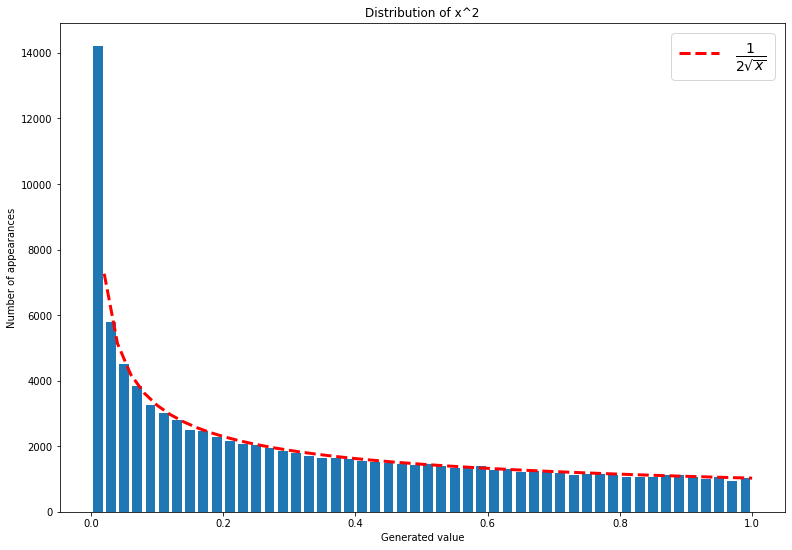

In [ ]:
# creating a distribution of f^2

bins = 50 
test = [g(f()) for i in range(100000)]
fig, ax = plt.subplots(figsize = (13,9))
y,x,z = ax.hist(test, bins, rwidth = 0.75)

ax.set_xlabel('Generated value')
ax.set_ylabel('Number of appearances')
ax.set_title("Distribution of x^2")

# plotting 1/(2sqrt(x)) probability density function scaled up

line = 1/(2*np.sqrt(np.array(x[1:])))
line = line*2*y[-1]
plt.plot(x[1:], line, 'r--', label = "$\\frac{1}{2\\sqrt{x}}$", linewidth = 3)
plt.legend(prop = {'size' : 20})

plt.show()

# Problem 4

In [ ]:
def f(x):
  """
  This is the function we need to integrate. It returns a multiplication of all 10 elements of an array
  """
  a = 1
  for i in x:
      a *= i
  return a

In [ ]:
# generating randoms dots in [0,2] cube in 10th dimension 1000000 times
dots = 2*np.random.random([1000000,10])

In [ ]:
# computing f values at the generated dots
fdots = [f(i) for i in dots]

In [ ]:
# calculating the integral using I = V/N*sum(f(x_i)) where V is the volume and N is the number of dots

integral = sum(fdots)/len(fdots)*2**10
print('The integral value is ', integral)

The integral value is  1021.4148576956087


In [ ]:
error = np.std(fdots)/np.sqrt(len(fdots))*2**10
print('Standard deviation is ', error)

Standard deviation is  4.121435365535918


In [ ]:
difference = (integral - 2**10)/error
print('The difference is ', abs(difference) , 'standard deviations')

The difference is  0.6272431993010635 standard deviations


In [ ]:
# a block repeating the same procedure for a "number" of randomly generated dots
def run(number):
    dots = 2*np.random.random([number,10])
    fdots = [f(i) for i in dots]
    integral = sum(fdots)/len(fdots)*2**10
    error = np.std(fdots)/np.sqrt(len(fdots))*2**10
    difference = (integral - 2**10)/error

    print('The value is:', integral, 'standard deviation is:', error)
    print('The difference is ', abs(difference) , 'standard deviations')

In [ ]:
# N = 10000
run(10000)

The value is: 1022.9361723825901 standard deviation is: 43.09312314453917
The difference is  0.024686714254654026 standard deviations


In [ ]:
# N = 40000
run(40000)

The value is: 1039.131631712487 standard deviation is: 20.757050376586193
The difference is  0.728987569908071 standard deviations


In [ ]:
# N = 160000
run(160000)

The value is: 1020.5516316967256 standard deviation is: 10.660559225006029
The difference is  0.3234697383590989 standard deviations


In [ ]:
# N = 10000000
run(10000000)

The value is: 1023.6424808272262 standard deviation is: 1.323195016728883
The difference is  0.2701938627743726 standard deviations


In [ ]:
np.std(np.arange(1,7))/np.sqrt(1000)

0.05400617248673217